In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Import Mobility Data

In [129]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
# keep FIPS as string to preserve leading zeroes

In [3]:
combined = pd.read_csv(r"/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/hia_covid_combined.csv", dtype={'County_FIPS': 'str'} )

In [4]:
combined.Name = combined.locationcol

In [74]:
combined.columns

Index(['Unnamed: 0', 'Date', 'County_FIPS', 'State Code', 'Name',
       'retail_and_recreation_PCT_CFB', 'grocery_and_pharmacy_PCT_CFB',
       'parks_PCT_CFB', 'transit_stations_PCT_CFB', 'workplaces_PCT_CFB',
       'residential_PCT_CFB', 'retail_and_recreation_PCT_CFB_RollingAvg',
       'grocery_and_pharmacy_PCT_CFB_RollingAvg', 'parks_PCT_CFB_RollingAvg',
       'transit_stations_PCT_CFB_RollingAvg', 'workplaces_PCT_CFB_RollingAvg',
       'residential_PCT_CFB_RollingAvg', 'HS_DIPLOMA_ONLY_2018',
       'SOME_COLLEGE_2018', 'BACHELORS_PLUS_2018', 'Poverty_PCT_2018',
       'UrbanCD', 'Median_Income_2018', 'Population_ACS',
       'Population_Black_ACS', 'Population_Hisp_ACS', 'Population_Native_ACS',
       'PCT_Black_ACS', 'PCT_Hisp_ACS', 'PCT_Native_ACS',
       'UrbanCD_Description', 'Metro', 'State', 'Confirmed', 'Deaths',
       'Country/Region', 'Deaths_Previous', 'Confirmed_Previous', 'Deaths_New',
       'Deaths_New_7', 'Deaths_New_14', 'Deaths_New_21', 'Deaths_New_28',
 

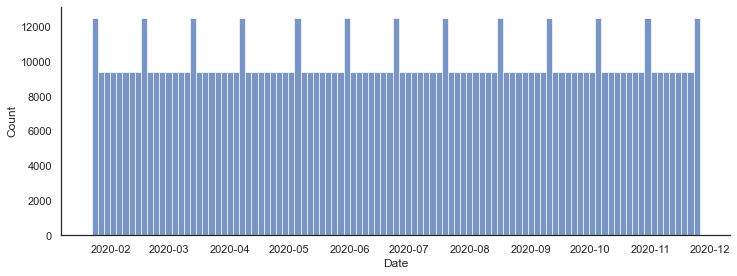

In [199]:
sns.displot(combined.Date, height=4, aspect=2.6)

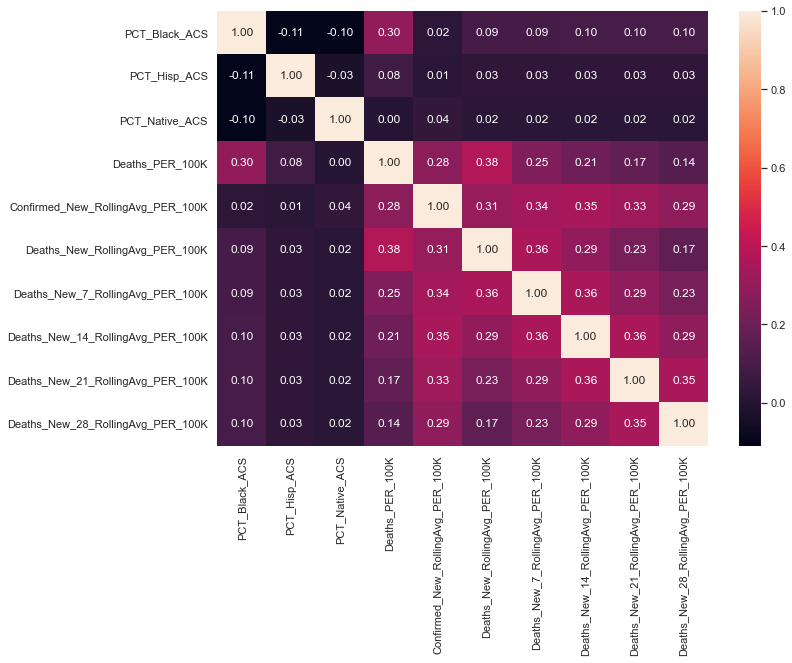

In [139]:

cols_subset = [i for i in combined_sample.columns if ("PER_100K" in i and "Rolling" in i) 
               or ("ACS" in i and "PCT" in i) or i == "Deaths_PER_100K"]
combined_sub2 = combined[cols_subset]

sns.set(rc={'figure.figsize':(11,8)})
corr = combined_sub2.corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

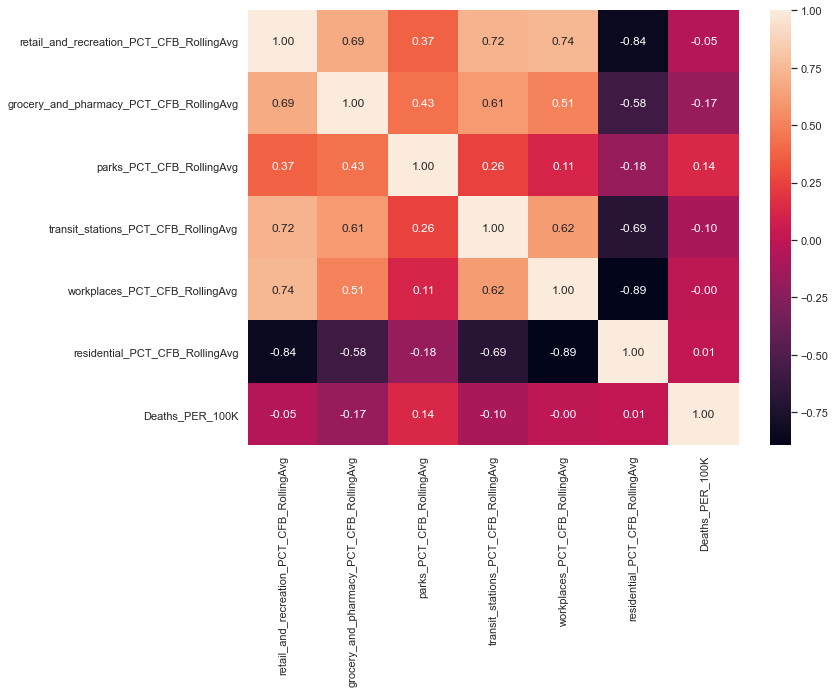

In [140]:

cols_subset = [i for i in combined_sample.columns if ("CFB" in i and "Rolling" in i)
                          or i == "Deaths_PER_100K"]

combined_sub2 = combined[cols_subset]

sns.set(rc={'figure.figsize':(11,8)})
corr = combined_sub2.corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [78]:
combined.Deaths.isna().value_counts()

False    970300
Name: Deaths, dtype: int64

In [79]:
combined['Date'] = combined['Date'].astype("datetime64")

In [141]:
combined_sub = combined.drop(columns=['Unnamed: 0','Country/Region'])

In [142]:
combined_sub.Name.isna().value_counts()

False    970300
Name: Name, dtype: int64

In [143]:
combined_sub.locationcol.isna().value_counts()

False    970300
Name: locationcol, dtype: int64

In [144]:
combined_sub['Date'].isna().value_counts()

False    970300
Name: Date, dtype: int64

In [145]:
combined_sub['State Code'].isna().value_counts()

False    970300
Name: State Code, dtype: int64

## Examine per-county distributions

In [146]:
list_cols = list(combined_sub.columns)

list_cols = [i for i in list_cols if i not in ["Date","locationcol","State","State Code","Name","County_FIPS","Region","Division","Metro"]]
list_cols

['retail_and_recreation_PCT_CFB',
 'grocery_and_pharmacy_PCT_CFB',
 'parks_PCT_CFB',
 'transit_stations_PCT_CFB',
 'workplaces_PCT_CFB',
 'residential_PCT_CFB',
 'retail_and_recreation_PCT_CFB_RollingAvg',
 'grocery_and_pharmacy_PCT_CFB_RollingAvg',
 'parks_PCT_CFB_RollingAvg',
 'transit_stations_PCT_CFB_RollingAvg',
 'workplaces_PCT_CFB_RollingAvg',
 'residential_PCT_CFB_RollingAvg',
 'HS_DIPLOMA_ONLY_2018',
 'SOME_COLLEGE_2018',
 'BACHELORS_PLUS_2018',
 'Poverty_PCT_2018',
 'UrbanCD',
 'Median_Income_2018',
 'Population_ACS',
 'Population_Black_ACS',
 'Population_Hisp_ACS',
 'Population_Native_ACS',
 'PCT_Black_ACS',
 'PCT_Hisp_ACS',
 'PCT_Native_ACS',
 'UrbanCD_Description',
 'Confirmed',
 'Deaths',
 'Deaths_Previous',
 'Confirmed_Previous',
 'Deaths_New',
 'Deaths_New_7',
 'Deaths_New_14',
 'Deaths_New_21',
 'Deaths_New_28',
 'Confirmed_New',
 'Confirmed_New_RollingAvg',
 'Deaths_New_RollingAvg',
 'Deaths_New_7_RollingAvg',
 'Deaths_New_14_RollingAvg',
 'Deaths_New_21_RollingAvg',


In [147]:
#county_desc = combined_sub[["locationcol","County_FIPS","State Code","Region","Division","Metro"]].drop_duplicates()
#county = pd.DataFrame(county) 
#county.reset_index(inplace=True)

county = combined_sub.groupby(["Name","County_FIPS","State Code","Region","Division","Metro"])[list_cols].mean()

In [148]:
county.reset_index(inplace=True)

In [149]:
county_samp = county.sample(frac=.1)

In [150]:
county.PCT_Hisp_ACS.describe()

count   3130.00000
mean       9.13399
std       13.73332
min        0.00000
25%        2.04563
50%        3.97820
75%        9.28364
max       99.18480
Name: PCT_Hisp_ACS, dtype: float64

In [151]:
county[county.Name.str.contains("Fairfax")]

,Name,County_FIPS,State Code,Region,Division,Metro,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,...,Deaths_New_14_PER_100K,Deaths_New_21_PER_100K,Deaths_New_28_PER_100K,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K
893,Fairfax City|Virginia,51600,VA,South,South Atlantic,Large_metro,-32.36264,-9.45560,-39.83333,nan,...,0.12895,0.13207,0.13535,2.86843,2.81126,0.11397,0.11627,0.11908,0.12202,0.12512


In [152]:
county.Deaths_PER_100K.describe()

count   3130.00000
mean      21.83325
std       26.73661
min        0.00000
25%        5.46972
50%       12.93755
75%       28.08422
max      263.73675
Name: Deaths_PER_100K, dtype: float64

In [153]:
county[(county.Deaths_PER_100K >= county.Deaths_PER_100K.mean()*10)]

,Name,County_FIPS,State Code,Region,Division,Metro,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,...,Deaths_New_14_PER_100K,Deaths_New_21_PER_100K,Deaths_New_28_PER_100K,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K
274,Bronx|New York,36005,NY,Northeast,Middle Atlantic,Large_metro,-25.66197,-6.99296,-4.35915,-31.69014,...,1.16655,1.19480,1.22446,13.86620,13.89712,1.14044,1.16348,1.19156,1.22103,1.25200
1168,Hancock|Georgia,13141,GA,South,South Atlantic,Micropolitan,nan,0.57143,nan,nan,...,1.79307,1.83650,1.88209,18.33387,18.13117,1.72445,1.75928,1.80175,1.84632,1.89314
2371,Randolph|Georgia,13243,GA,South,South Atlantic,Noncore_adjacent,-43.33333,nan,nan,nan,...,1.40649,1.44055,1.47631,16.52704,16.75617,1.37399,1.40175,1.43559,1.47109,1.50840
2764,Terrell|Georgia,13273,GA,South,South Atlantic,Smaller_metro,-9.29412,-1.07843,nan,nan,...,1.24177,1.27185,1.30342,14.23833,14.43100,1.21309,1.23759,1.26747,1.29882,1.33176


In [154]:
county[county.Metro.isna() == True]

,Name,County_FIPS,State Code,Region,Division,Metro,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,...,Deaths_New_14_PER_100K,Deaths_New_21_PER_100K,Deaths_New_28_PER_100K,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K


## Longitudinal graphs by county

In [155]:
import random 


In [156]:
bigh = combined_sub[combined_sub.County_FIPS == "04001"]
bigh.head(40)

,Date,County_FIPS,State Code,Name,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,workplaces_PCT_CFB,residential_PCT_CFB,...,Deaths_New_28_PER_100K,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K,Region,Division
29450,2020-01-22,04001,AZ,Apache|Arizona,nan,nan,nan,nan,nan,nan,...,0.00000,nan,nan,nan,nan,nan,nan,nan,West,Mountain
29451,2020-01-23,04001,AZ,Apache|Arizona,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,nan,nan,nan,nan,nan,nan,West,Mountain
29452,2020-01-24,04001,AZ,Apache|Arizona,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,nan,nan,nan,nan,nan,nan,West,Mountain
29453,2020-01-25,04001,AZ,Apache|Arizona,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,nan,nan,nan,nan,nan,nan,West,Mountain
29454,2020-01-26,04001,AZ,Apache|Arizona,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,nan,nan,nan,nan,nan,nan,West,Mountain
29455,2020-01-27,04001,AZ,Apache|Arizona,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,nan,nan,nan,nan,nan,nan,West,Mountain
29456,2020-01-28,04001,AZ,Apache|Arizona,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,nan,nan,0.00000,0.00000,0.00000,0.00000,West,Mountain
29457,2020-01-29,04001,AZ,Apache|Arizona,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,West,Mountain
29458,2020-01-30,04001,AZ,Apache|Arizona,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,West,Mountain
29459,2020-01-31,04001,AZ,Apache|Arizona,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,West,Mountain


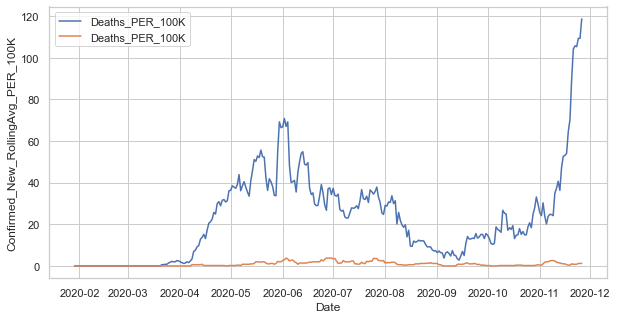

In [157]:
sns.set_style("whitegrid")


plt.figure(figsize=(10,5)) 
sns.lineplot(x="Date", y="Confirmed_New_RollingAvg_PER_100K", label="Deaths_PER_100K", data=bigh)
sns.lineplot(x="Date", y="Deaths_New_RollingAvg_PER_100K", label="Deaths_PER_100K", data=bigh)
plt.legend(loc="upper left")
plt.show()

In [158]:
combined_sub[combined_sub.Date.isna() == True]

,Date,County_FIPS,State Code,Name,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,workplaces_PCT_CFB,residential_PCT_CFB,...,Deaths_New_28_PER_100K,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K,Region,Division


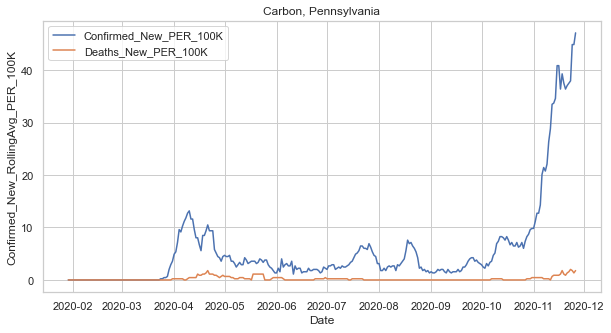

42025


In [162]:
sns.set_style("whitegrid")

u_FIPS = list(combined_sub.County_FIPS.unique())
random_FIPS =  random.choice(u_FIPS)

random_df = combined_sub[combined_sub.County_FIPS == random_FIPS]
random_name = combined_sub[combined_sub.County_FIPS == random_FIPS]['Name'].iloc[0]
random_state = combined_sub[combined_sub.County_FIPS == random_FIPS]['State'].iloc[0]

plt.figure(figsize=(10,5)) 
sns.lineplot(x="Date", y="Confirmed_New_RollingAvg_PER_100K", label="Confirmed_New_PER_100K", data=random_df)
sns.lineplot(x="Date", y="Deaths_New_RollingAvg_PER_100K", label="Deaths_New_PER_100K", data=random_df)
plt.legend(loc="upper left")
plt.title("{title}".format(title=random_name.replace('|',', ')))
plt.show()
print(random_FIPS)

In [163]:
import random as random

list_counties = list(county[county.Population_ACS >= 100000].County_FIPS.unique())
list_random = random.choices(list_counties, k=4)

In [164]:
travis = combined_sub[combined_sub.Name=='Travis|Texas']
travis.to_csv("travis.csv")

In [165]:
combined_sub

,Date,County_FIPS,State Code,Name,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,workplaces_PCT_CFB,residential_PCT_CFB,...,Deaths_New_28_PER_100K,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K,Region,Division
0,2020-01-22,01001,AL,Autauga|Alabama,nan,nan,nan,nan,nan,nan,...,0.00000,nan,nan,nan,nan,nan,nan,nan,South,East South Central
1,2020-01-23,01001,AL,Autauga|Alabama,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,nan,nan,nan,nan,nan,nan,South,East South Central
2,2020-01-24,01001,AL,Autauga|Alabama,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,nan,nan,nan,nan,nan,nan,South,East South Central
3,2020-01-25,01001,AL,Autauga|Alabama,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,nan,nan,nan,nan,nan,nan,South,East South Central
4,2020-01-26,01001,AL,Autauga|Alabama,nan,nan,nan,nan,nan,nan,...,0.00000,0.00000,nan,nan,nan,nan,nan,nan,South,East South Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970295,2020-11-22,56045,WY,Weston|Wyoming,nan,nan,nan,nan,nan,nan,...,nan,84.30518,66.23979,0.00000,nan,nan,nan,nan,West,Mountain
970296,2020-11-23,56045,WY,Weston|Wyoming,nan,nan,nan,nan,-23.00000,nan,...,nan,0.00000,68.24705,2.00727,nan,nan,nan,nan,West,Mountain
970297,2020-11-24,56045,WY,Weston|Wyoming,nan,nan,nan,nan,-21.00000,nan,...,nan,154.55951,74.26885,2.00727,nan,nan,nan,nan,West,Mountain
970298,2020-11-25,56045,WY,Weston|Wyoming,nan,nan,nan,nan,nan,nan,...,nan,42.15259,66.23979,2.00727,nan,nan,nan,nan,West,Mountain


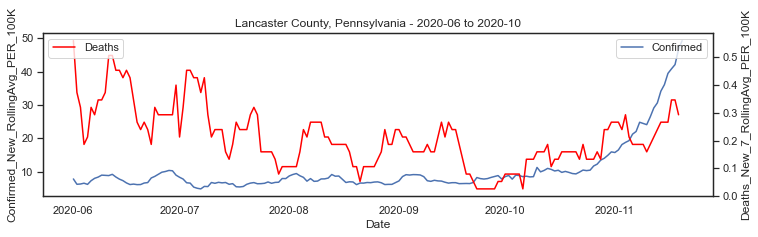

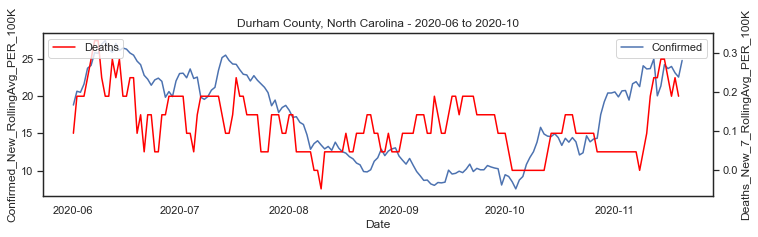

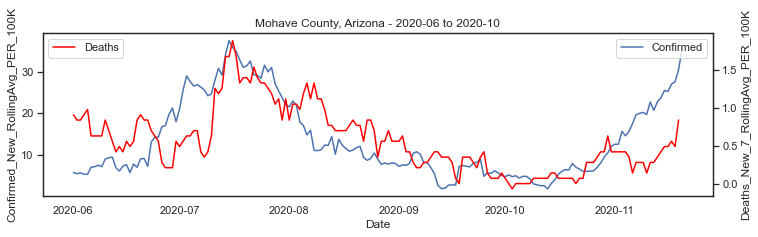

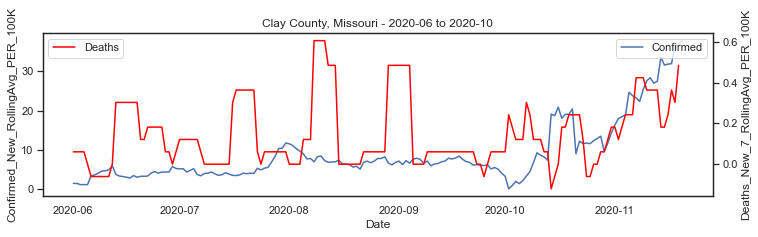

In [194]:
for i in list_random:
    sns.set_style("white")
    bigh = combined_sub[combined_sub['County_FIPS'] == i]
    bigh = bigh[bigh.Date <= '2020-11-20']
    bigh = bigh[bigh.Date >= '2020-06-01']
    name_county = bigh.Name.iloc[0]
    plt.figure(figsize=(12,3)) 
    ax = sns.lineplot(x="Date", y="Confirmed_New_RollingAvg_PER_100K", label="Confirmed", data=bigh)
    plt.legend(loc="upper right")
    ax2 = ax.twinx()
    ax2 = sns.lineplot(x="Date", y="Deaths_New_7_RollingAvg_PER_100K", label="Deaths", color='red', data=bigh)
    plt.title("{x} - 2020-06 to 2020-10".format(x=name_county.replace('|',' County, ')))
    plt.legend(loc="upper left")
    plt.show()

In [169]:
list_tup = []
for i in range(4,9):
    a = '2020-0{c}-01'.format(c=i)
    b = '2020-0{c}-01'.format(c=i+1)
    list_tup.append((a,b))

for i in range(10,12):
    a = '2020-{c}-01'.format(c=i)
    b = '2020-{c}-01'.format(c=i+1)
    list_tup.append((a,b))

In [170]:
list_tup

[('2020-04-01', '2020-05-01'),
 ('2020-05-01', '2020-06-01'),
 ('2020-06-01', '2020-07-01'),
 ('2020-07-01', '2020-08-01'),
 ('2020-08-01', '2020-09-01'),
 ('2020-10-01', '2020-11-01'),
 ('2020-11-01', '2020-12-01')]

## Make the county level dataframe population - weighted 

In the county-level dataset, each county is represented by one row. However, to do density analysis, this view is misleading because of the extreme inequality of county populations. To remedy this, we can explode the dataset to give each county a row in the dataset for each 1,000 residents. 

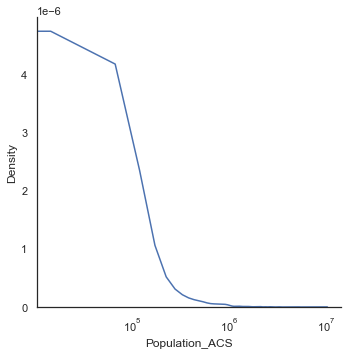

In [196]:
sns.displot(county.Population_ACS, kind="kde").set(xscale = 'log')

In [109]:
list_frame = []

from tqdm import tqdm

for i in tqdm(list(county.County_FIPS.unique())):
    frame = county[county.County_FIPS == i]
    frame['pop_1k'] = frame['Population_ACS']/1000 # Each row will represent 1k people
    frame['key'] = 'key'
    joinframe = pd.DataFrame(pd.Series(list(range(0,int(frame.pop_1k.max())))))
    joinframe['key'] = 'key'
    joinframe.columns = ['val','key']
    cartesian = frame.merge(joinframe, on="key")
    #frame_weighted = cartesian[cartesian.Deaths <= cartesian.val]
    list_frame.append(cartesian)

  0%|          | 0/3130 [00:00<?, ?it/s]/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
  2%|▏         | 78/3130 [00:00<00:12, 247.43it/s]/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series

In [188]:
frame_concat = pd.concat(list_frame)

In [189]:
frame_concat.shape[0]
# roughly one row per 1,000 inhabitants of the US

315433

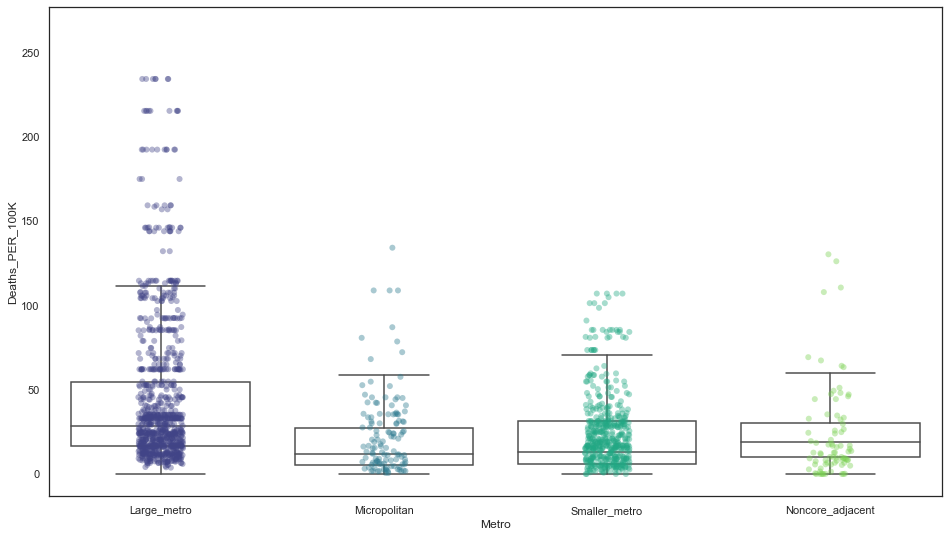

In [210]:
plt.figure(figsize=(16,9)) 
frame = frame_concat.sample(frac=.1)
frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro","Noncore_adjacent"])]
frame.sort_values(by="Metro", inplace=True)
#frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro"])]
frame = frame.sort_values(by="Metro")
#sns.violinplot(x="Metro", y="Deaths_PER_100K", label="work", data=frame, scale="count")
sns.boxplot(x="Metro", y="Deaths_PER_100K", data=frame,  boxprops={'facecolor':'None'}, fliersize=0)
sns.stripplot(x="Metro", y="Deaths_PER_100K", label="work", data=frame.sample(frac=.05), size=6, alpha=.4, dodge=True, palette="viridis")
plt.show()


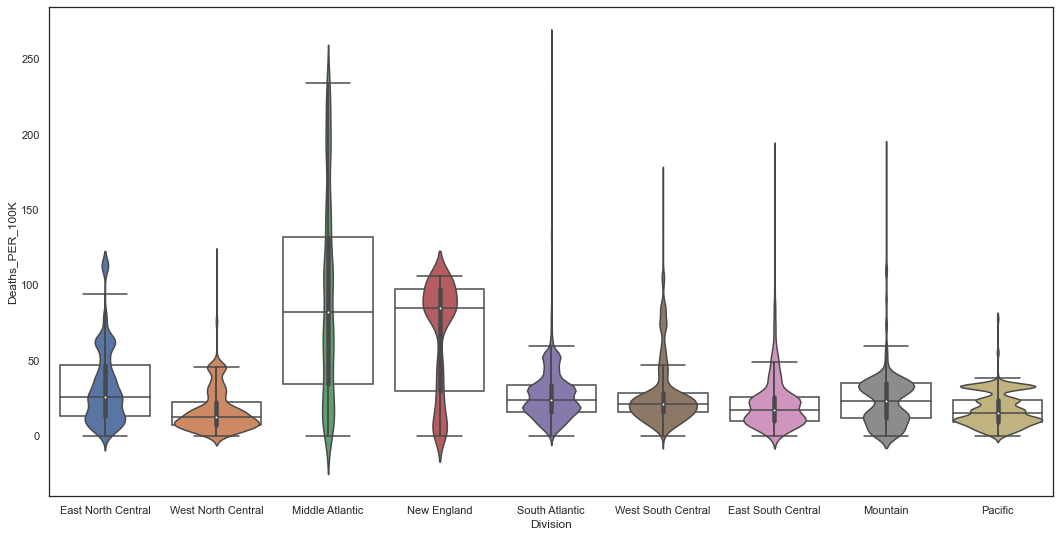

In [192]:
plt.figure(figsize=(18,9)) 
frame = frame_concat.sample(frac=.1)
frame.sort_values(by="Division", inplace=True)
frame = frame.sort_values(by="Region")
sns.violinplot(x="Division", y="Deaths_PER_100K", label="work", data=frame)
sns.boxplot(x="Division", y="Deaths_PER_100K", data=frame,  boxprops={'facecolor':'None'}, fliersize=0)
#sns.swarmplot(x="Division", y="Deaths_PER_100K", label="work", data=frame, size=.5, alpha=.6, dodge=True, palette="viridis")
plt.show()


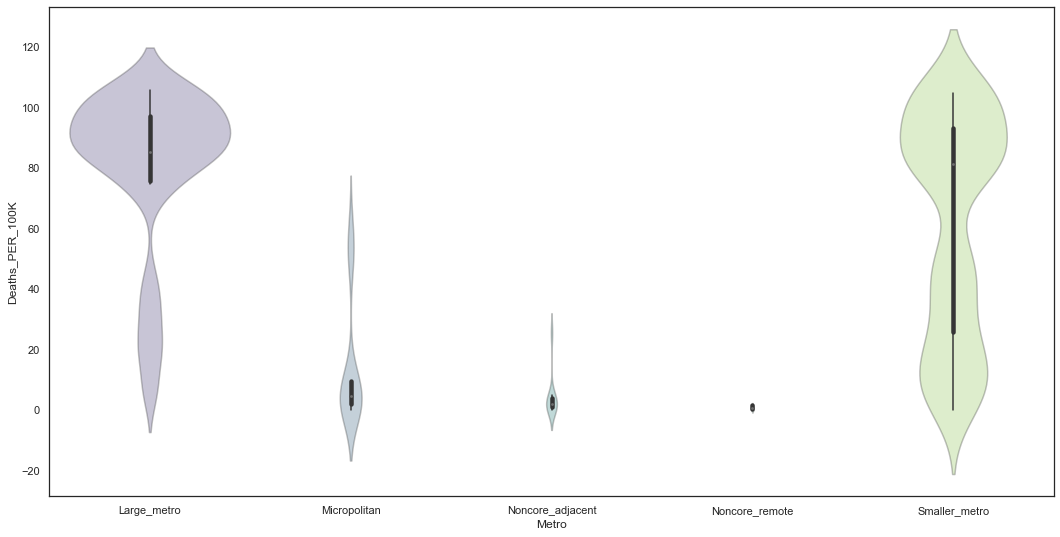

In [211]:
plt.figure(figsize=(18,9)) 
frame = frame_concat[frame_concat.Division == "New England"].sample(frac=.1)
frame.sort_values(by="Metro", inplace=True)
ax = sns.violinplot(x="Metro", y="Deaths_PER_100K", label="work", palette="viridis", alpha=.2, scale="count", data=frame)
#sns.boxplot(x="Metro", y="Deaths_PER_100K", data=frame,  boxprops={'facecolor':'None'}, fliersize=0)
#ax = sns.swarmplot(x="Metro", y="Deaths_PER_100K", label="work", data=frame, size=2, dodge=True, palette="viridis")
plt.setp(ax.collections, alpha=.3)
plt.show()


In [ ]:
import numpy as np
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the widths of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

In [ ]:
def boxplot_with_violins(df, Yvar = "Deaths_PER_100K", group="Region"):
    frame = df
    frame = frame.sort_values(by=group)
    #frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro","Noncore_adjacent"])]

    fig = plt.figure(figsize=(9,6))

    ax = sns.boxplot(x=group, y=Yvar, data=frame, boxprops={'facecolor':'None'}, fliersize=0)
    ax = sns.violinplot(x=group, y=Yvar, scale="count", data=frame, inner="quart", despine=True)

    plt.setp(ax.collections, alpha=.4)
    plt.ylim(-10,frame["{Yvar}".format(Yvar=Yvar)].max()*.95)

    adjust_box_widths(fig, 0.9)
    
    fig.show()

In [ ]:
def upper_limit(series):
    from scipy.stats import iqr
    import numpy as np
    Q3 = np.percentile(series, 75, interpolation = 'midpoint') 
    return int(Q3+(4*iqr(series)))

In [ ]:
def boxplot_with_violins_grp(df, Yvar = "Deaths_PER_100K",  group="Region"):
    frame = df
    frame = frame.sort_values(by=group)
    #frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro","Noncore_adjacent"])]

    fig = plt.figure(figsize=(24,12))
    
    ax = sns.boxplot(x=group, y=Yvar, hue="Metro", data=frame, boxprops={'facecolor':'None'}, fliersize=0)
    ax = sns.violinplot(x=group, y=Yvar, hue="Metro", scale="count", data=frame, inner="quart", despine=True)

    #Make legend distinct 
    handles, labels = ax.get_legend_handles_labels()
    num_legend = len(df["{x}".format(x=group)].unique())
    plt.legend(handles[0:num_legend], labels[0:num_legend], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.setp(ax.collections, alpha=.4)
    
    #plt.ylim(-10,frame["{Yvar}".format(Yvar=Yvar)].max()*.75)
   
    upper_limit_number = upper_limit(frame["{Yvar}".format(Yvar=Yvar)])
    plt.ylim(-10,upper_limit_number)
    adjust_box_widths(fig, 0.8)
    #plt.legend()
    fig.show()

In [ ]:
boxplot_with_violins_grp(frame_concat,Yvar = "Confirmed_PER_100K")

In [ ]:
frame = frame_concat.sample(frac=.1)
#frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro","Noncore_adjacent"])]
#plt.figure(figsize=(22,9)) 

fig = plt.figure(figsize=(22, 9))

ax = sns.boxplot(x="Region", y="Deaths_PER_100K", data=frame, boxprops={'facecolor':'None'}, fliersize=0)
ax = sns.swarmplot(x="Region", y="Deaths_PER_100K",  alpha=.95, data=frame, size=.75, dodge=True)
#plt.setp(ax.collections, alpha=.9)
plt.ylim(-10,frame.Deaths_PER_100K.max()*1.1)

adjust_box_widths(fig, 0.9)

In [ ]:
frame_concat.columns

In [ ]:
frame = frame_concat
frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro","Noncore_adjacent"])]
#plt.figure(figsize=(22,9)) 

fig = plt.figure(figsize=(22, 9))

#ax = sns.boxplot(x="Division", y="Confirmed_New_RollingAvg_PER_100K", hue="Metro", data=frame, fliersize=0)
ax = sns.violinplot(x="Division", y="Confirmed_New_RollingAvg_PER_100K",  hue="Metro", scale="count", data=frame, inner="quart", size=2, dodge=True, despine=True)
plt.setp(ax.collections, alpha=.4)
plt.ylim(-10,150)

adjust_box_widths(fig, 0.9)

In [ ]:
pop = pd.DataFrame(frame.groupby(["Division"])["Population_ACS"].sum())

In [ ]:
frame = frame_concat.sample(frac=.1)
frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro"])]
#plt.figure(figsize=(22,9)) 

fig = plt.figure(figsize=(22, 9))

ax = sns.boxplot(x="Region", y="Deaths_New_7_RollingAvg_PER_100K", hue="Metro", data=frame, boxprops={'facecolor':'None'}, fliersize=0)
ax = sns.violinplot(x="Region", y="Deaths_New_7_RollingAvg_PER_100K",  hue="Metro", scale="count", data=frame, inner="quart", size=2, dodge=True, despine=True)
plt.setp(ax.collections, alpha=.4)
plt.ylim(-1,2.5)

adjust_box_widths(fig, 0.9)

In [ ]:
sns.distplot(frame.Deaths_New_7_RollingAvg_PER_100K)

In [ ]:
combined_sub['week_of_yr'] = combined_sub.date.dt.week

In [ ]:
cols = list(combined_sub.columns)

list_df = [] 

for i in tqdm(range(12,combined_sub.week_of_yr.max())):
    county = combined_sub[(combined_sub.week_of_yr == i)]
    date = county.date.max()
    county = county.groupby(["County_FIPS","Metro","Division","StateCD"])[cols].mean()
    county = pd.DataFrame(county)
    county['date'] = date
    county.reset_index(inplace=True)
    list_df.append(county)

In [ ]:
list_df[2] #.Metro

In [ ]:
def explode_df_pop_weight(df):
    list_frame  = []
    for i in tqdm(list(df.County_FIPS.unique())):
        frame = df[df.County_FIPS == i]
        frame['pop_1k'] = frame['Population_ACS']/1000 # Each row will represent 1k people
        frame['key'] = 'key'
        joinframe = pd.DataFrame(pd.Series(list(range(0,int(frame.pop_1k.max())))))
        joinframe['key'] = 'key'
        joinframe.columns = ['val','key']
        cartesian = frame.merge(joinframe, on="key")
        list_frame.append(cartesian)
    exploded_frame = pd.concat(list_frame)
    return exploded_frame

In [ ]:
exp = explode_df_pop_weight(list_df[2])

In [ ]:
list_exploded_df = [explode_df_dateweight(i) for i in list_df]

In [ ]:
colslist = list(list_exploded_df[2].columns)
Yvarlist = [i for i in colslist if "RollingAvg" in i]

In [ ]:
colslist

In [ ]:
Yvar_list = [
 #'retail_and_recreation_PCT_CFB_RollingAvg',
 #'grocery_and_pharmacy_PCT_CFB_RollingAvg',
 #'parks_PCT_CFB_RollingAvg',
 #'transit_stations_PCT_CFB_RollingAvg',
 'workplaces_PCT_CFB_RollingAvg',
 'residential_PCT_CFB_RollingAvg',
 'Confirmed_New_RollingAvg_PER_100K',
 'Deaths_New_RollingAvg_PER_100K']

In [ ]:
grouplist = ['Metro','Region']

In [ ]:
import os
os.getcwd()
os.chdir("/Users/philip.ballentine/Documents/grphimg")

In [ ]:
#conda install -c conda-forge imageio

In [ ]:
def gif_from_images(animated_filename="movie.gif"):
    """ goes into the working directory (set earlier) and combined all images into an animated gif"""
    import imageio
    image_list = sorted(os.listdir(os.getcwd()))
    image_list_sub = [i for i in image_list if '2020' in i]
    images = []
    for filename in image_list_sub:
        images.append(imageio.imread(filename))
    imageio.mimsave(animated_filename+'.gif', images, duration=.5)

In [ ]:
combined_sub.columns

In [ ]:
combined_sub['retail_and_recreation_PCT_CFB'].quantile(.10)

In [ ]:
combined_sub['retail_and_recreation_PCT_CFB'].quantile(.9)

In [ ]:
def loop_for_gif_by_metro(Yvar="Deaths_PER_100K", group="Metro"):
    
    ## Creating file structure
    import os 
    foldername = "{Yvar}_by_{group}".format(Yvar=Yvar, group=group)
    try:
        os.chdir("/Users/philip.ballentine/Documents/grphimg/{foldername}".format(foldername=foldername))
    except:
        os.mkdir("/Users/philip.ballentine/Documents/grphimg/{foldername}".format(foldername=foldername))
        os.chdir("/Users/philip.ballentine/Documents/grphimg/{foldername}".format(foldername=foldername))
    
    ## Iterating through dataframes and creating the plots
    for i in tqdm(random.choices(list_exploded_df, k= 3)):
    #for i in tqdm(list_exploded_df): 
        frame = i
        frame = frame.sort_values(by='{group}'.format(group=group))
        fig = plt.figure(figsize=(9, 6))
        #frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro"])]
        ax = sns.boxplot(x=group, y=Yvar, data=frame, boxprops={'facecolor':'None'}, fliersize=0)
        ax = sns.violinplot(x=group, y=Yvar, scale="count", data=frame, inner="quart", dodge=True, despine=True)

        plt.setp(ax.collections, alpha=.4)
        ## Setting the Y-Lims
        #if "PCT" in Yvar:
            #plt.ylim(combined_sub['{Yvar}'.format(Yvar=Yvar)].min(),combined_sub['{Yvar}'.format(Yvar=Yvar)].max())
            #quant10 = combined_sub['{Yvar}'.format(Yvar=Yvar)].quantile(.1)
            #quant90 = combined_sub['{Yvar}'.format(Yvar=Yvar)].quantile(.9)
            #plt.ylim(quant10,quant90)
        #if "Confirmed" in Yvar: 
            #stdev = combined_sub['{Yvar}'.format(Yvar=Yvar)].std()
            #mean = combined_sub['{Yvar}'.format(Yvar=Yvar)].mean()
            #limits = ((mean-(stdev*3)),(mean+(stdev*3)))
            #quant10 = combined_sub['{Yvar}'.format(Yvar=Yvar)].quantile(.1)
            #quant90 = combined_sub['{Yvar}'.format(Yvar=Yvar)].quantile(.9)
            #plt.ylim(quant10,quant90)
       # else: 
            #stdev = combined_sub['{Yvar}'.format(Yvar=Yvar)].std()
            #plt.ylim(-1,combined_sub['{Yvar}'.format(Yvar=Yvar)].mean()+(5*stdev))
        
        ## Titles and file saving
        datestr = str(i.date.max())[0:11]
        plt.title("{datestr} - {Yvar} by {group}, Population Weighted".format(datestr=datestr, Yvar=Yvar, group=group))
        plt.tight_layout()
        plt.savefig("{datestr}.png".format(datestr=datestr), dpi=300)
        #print("{datestr}.png has been created in {foldername}".format(datestr=datestr, foldername=foldername))

## Animated GIF creation
    gif_from_images(animated_filename=foldername)

In [ ]:
loop_for_gif_by_metro("retail_and_recreation_PCT_CFB", group="Metro")

In [ ]:
all_combo_list = []
for i in Yvar_list:
    for x in grouplist:
        all_combo_list.append((i,x))

In [ ]:
all_combo_list

In [ ]:
for i in all_combo_list:
    try:
        loop_for_gif_by_metro(Yvar=i[0], group=i[1])
    except:
        print("failure for {x}".format(x=str(i)))
        continue